# **Task 1**

## Import libraries and load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
from cleantext import clean
import matplotlib as plt
import nltk
#nltk.download('all')
from nltk.probability import FreqDist

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
# Load data as data frame
corpusSample_df = pd.read_csv("FakeNewsCorpusSample.csv")

## Clean ```content``` variable

In [ ]:
# The function clean_text() does this:
#   - all words will be lowercased
#   - tabs, new lines and multiple white spaces will be set to single white space
#   - numbers, dates, emails, and URLs will be replaced by "\<NUM>", "\<DATE>", "\<EMAIL>" AND "\<URL>", respectively.
def clean_text(data):
  # Replace dates with <DATE>.
  # This line replace dates of format DD-MM-YYYY, MM-DD-YYYY, DD/MM/YYYY, MM/DD/YYYY, 
  # DD-MM-YY, MM-DD-YY, DD/MM/YY, MM/DD/YY with <DATE>
  data = re.sub("^(3[01]|[12][0-9]|0?[1-9])(\/|-)(1[0-2]|0?[1-9])\2([0-9]{2})?[0-9]{2}$", "<DATE>", data) 
  # Consider adding other date formats, like "Sept 6", "September 6, 2019", etc.

  # Use clean() for remaining cleaning
  cleaned = clean(data,
      fix_unicode=False,           # fix various unicode errors
      to_ascii=False,              # transliterate to closest ASCII representation
      lower=True,                  # lowercase text
      no_line_breaks=True,         # fully strip line breaks as opposed to only normalizing them
      no_urls=True,                # replace all URLs with a special token
      no_emails=True,              # replace all email addresses with a special token
      no_phone_numbers=False,      # replace all phone numbers with a special token
      no_numbers=True,             # replace all numbers with a special token
      no_digits=False,             # replace all digits with a special token
      no_currency_symbols=False,   # replace all currency symbols with a special token
      no_punct=False,              # remove punctuations
      replace_with_punct="",       # instead of removing punctuations you may replace them
      replace_with_url="<URL>",
      replace_with_email="<EMAIL>",
      replace_with_phone_number="<PHONE>",
      replace_with_number="<NUM>",
      replace_with_digit="0",
      replace_with_currency_symbol="<CUR>",
      lang="en"                     # set to 'de' for German special handling
  )
  return cleaned

In [4]:
content_sample_cleaned = corpusSample_df['content'].apply(clean_text) 

## Tokenize ```content``` variable

In [5]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import MWETokenizer 
multiWordsTokenizer = MWETokenizer([('<', 'num', '>'), ('<', 'date', '>'), ('<', 'email', '>'), ('<', 'url', '>')], separator='')

In [6]:
# Function that tokenize a string
def tokenize(data_string):

    # Word tokenize
    data_string = word_tokenize(data_string)

    # MAKE '<', 'NUM' and '>' into '<NUM>'. Same for <DATE>, <EMAIL> and <URL>:
    data_string = multiWordsTokenizer.tokenize(data_string)

    return data_string

In [7]:
content_sample_tokenized = content_sample_cleaned.apply(tokenize)

## Remove stop words

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [9]:
# Function that removes stop words from a string
def removeStopWords(words):
    filteredWords = []

    for w in words:
        if w not in stop_words:
            filteredWords.append(w)
    return(filteredWords)

In [10]:
# Remove stop words
content_sample_no_stop_words = content_sample_tokenized.apply(removeStopWords)

## Perform stemming on ```content``` variable

In [11]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [12]:
# Function that performs stemming on a string
def stemming(words):

    stemmedWords = []
    for w in words:
        stemmedWords.append(stemmer.stem(w))
    
    return(stemmedWords)

In [13]:
content_sample_stemmed = content_sample_no_stop_words.apply(stemming)

## Reduction rates

In [14]:
# Using FreqDist() we can see the vocabulary as well as the frequence of each token
tokens_after_tokenization = [x.strip("'") for l in content_sample_tokenized for x in l]
tokens_after_tokenization_vocab = FreqDist(tokens_after_tokenization)

tokens_after_removing_stop_words = [x.strip("'") for l in content_sample_no_stop_words for x in l]
tokens_after_removing_stop_words_vocab = FreqDist(tokens_after_removing_stop_words)

tokens_after_stemming = [x.strip("'") for l in content_sample_stemmed for x in l]
tokens_after_stemming_vocab = FreqDist(tokens_after_stemming)

print(f"Size of vocabulary after tokenization: {len(tokens_after_tokenization_vocab)}\n")

print(f"Size of vocabulary after removal of stop words: {len(tokens_after_removing_stop_words_vocab)}\n")

print(f"Size of vocabulary after stemming: {len(tokens_after_stemming_vocab)}\n")

print(f"Reduction rate of the vocabulary size after removing stopwords: {(len(tokens_after_tokenization_vocab)
                                    - len(tokens_after_removing_stop_words_vocab)) / 
                                    len(tokens_after_tokenization_vocab) * 100}\n")

print(f"Reduction rate of the vocabulary size after stemming: {(len(tokens_after_removing_stop_words_vocab)
                                    - len(tokens_after_stemming_vocab)) / 
                                    len(tokens_after_removing_stop_words_vocab) * 100}\n")

# NB: We can find x most common tokens like this:
#print(f"10 most common words: {tokens_after_tokenization_vocab.most_common(10)}")

Size of vocabulary after tokenization: 16886

Size of vocabulary after removal of stop words: 16751

Size of vocabulary after stemming: 11589

Reduction rate of the vocabulary size after removing stopwords: 0.7994788582257492

Reduction rate of the vocabulary size after stemming: 30.816070682347323



# **Task 2**

In [31]:
# Load data as data frame
corpus_df = pd.read_csv("995,000_rows.csv")

C:\Users\Krist\AppData\Local\Temp\ipykernel_6816\2123372598.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  corpus_df = pd.read_csv("995,000_rows.csv")


In [32]:
# Remove non-relevant features
corpus_df = corpus_df[['domain','type', 'content', 'title', 'authors', 'meta_description']]

In [ ]:
# Remove rows with invalid values
corpus_df = corpus_df.drop(corpus_df[corpus_df['type'] == '2018-02-10 13:43:39.521661'].index)

In [33]:
# Remove data points where either 'type' or 'content' is NaN
corpus_df = corpus_df[corpus_df['type'].notna() & corpus_df['content'].notna()]

In [ ]:
# Clean 'content' and save data frame as .csv file
corpus_df_cleaned = corpus_df.copy()
corpus_df_cleaned['content'] = corpus_df_cleaned['content'].apply(clean_text)

corpus_df_cleaned.to_csv('corpus_cleaned.csv', index=False)

In [ ]:
# Tokenize 'content' and save data frame as .csv file
corpus_df_tokenized = corpus_df_cleaned.copy()
corpus_df_tokenized['content'] = corpus_df_tokenized['content'].apply(tokenize)

corpus_df_tokenized.to_csv('corpus_tokenized.csv', index=False)

In [ ]:
# Remove stop words from 'content' and save data frame as .csv file
corpus_df_no_stop_words = corpus_df_tokenized.copy()
corpus_df_no_stop_words['content'] = corpus_df_no_stop_words['content'].apply(removeStopWords)

corpus_df_no_stop_words.to_csv('corpus_no_stop_words.csv', index=False)

In [ ]:
# Perform stemming on 'content' and save data frame as .csv file
corpus_df_stemmed = corpus_df_no_stop_words.copy()
corpus_df_stemmed['content'] = corpus_df_stemmed['content'].apply(stemming)

corpus_df_stemmed.to_csv('corpus_stemmed.csv', index=False)

# Task 3 - the three questions

1. Data frames has labeled axes, as opposed to for instance numpy arrays. And it is possible to get a nice spreadsheet representation of the data set.
1. 
    - ```Authors``` variable has 44% missing values and ```meta_description``` has 53% -  making it hard to use them in a model.
    - The type value ```2018-02-10 13:43:39.521661``` only has one news article and it looks like the article has been mislabeled (the name is weird and all other domains has at least 8779 articles). Should be removed.
    - 'type' has 47786 missing values and 'content' has 12 missing values. The data points (rows) where either of these two values are missing should be removed.
1. Include for instance: Number of features and data points. Number of missing values for each feature. Number of distinct values for relevant features (and what the categorical values are). Data type of each feature.

# Task 3 - non-trivial observation

In this section we will see that...


- All texts from a particular domain is of the same type,

- Few domains accounts for a majority of the total number of articles.


- The distribution of article types are very uneven. For instance: There are 25 times as many articles of type 'reliable' than type 'hate',

- The average length of articles (the token count) for each article type varies greatly. 'hate' articles has the highest average token count and 'satire' has the lowest.


- There is a large variation in number of tokens in 'content' in each article. For instance: The longest article has 183,184 tokens, and the shortest has just one token, 

- Few articles has high amount of tokens (only 10,000 articles has more than 18,498 tokens)

In [ ]:
#corpus_df_stemmed.to_csv('corpus_stemmed.csv', index=False)
corpus_df_stemmed = pd.read_csv("corpus_stemmed.csv")

### Looking into 'domain'

In [17]:
print(f"Number of unique values in 'domain': {len(set(corpus_df_stemmed['domain']))}")

Number of unique values in 'domain': 619


In [21]:
# Here we see that all texts from a particular domain is of the same type
boolian_value = True
for x in set(corpus_df_stemmed['domain']):
    df_subset = corpus_df_stemmed[corpus_df_stemmed["domain"] == x]
    if(len(set(df_subset['type']))) != 1:
        print(x)
        boolian_value = False

if boolian_value:
    print("All texts from a particular domain is of the same type!")

All texts from a particular domain is of the same type!


In [49]:
# Here is the number of news texts for each domain
counts_domain = corpus_df_stemmed['domain'].value_counts()
counts_domain_df = counts_domain.rename_axis('unique_values').reset_index(name='counts')

# The domains with the most articles
print(f"The 10 domains with the most articles:\n{counts_domain[0:10]}\n")

# The domains with the fewest articles
print(f"The 10 domains with the fewest articles:\n{counts_domain[-10:]}")



The 10 domains with the most articles:
domain
nytimes.com           176144
beforeitsnews.com      91468
dailykos.com           77640
express.co.uk          55983
nationalreview.com     37377
sputniknews.com        37229
abovetopsecret.com     27947
wikileaks.org          23699
pravda.ru              10974
wikispooks.com          9520
Name: count, dtype: int64

The 10 domains with the fewest articles:
domain
news4ktla.com                       1
bighairynews.com                    1
firearmscoalition.org               1
elelephantintheroom.blogspot.com    1
flashnewscorner.com                 1
usafirstinformation.com             1
ushealthylife.com                   1
speld.nl                            1
2016-11-13T15:38:41.407+02:00       1
newsmagazine.com                    1
Name: count, dtype: int64


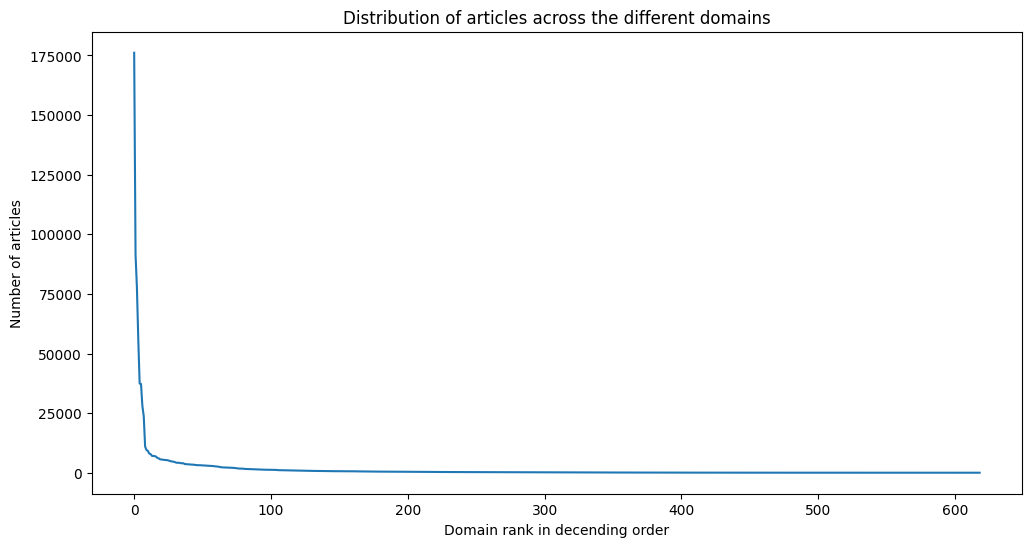

In [ ]:
# Plot of the distribution of articles across the different domains
plt.figure(figsize=(12,6))
plt.xlabel('Domain in decending order; value is the domain with most articles, etc.')
plt.ylabel('Number of articles')
plt.title('Distribution of articles across the different domains')
plt.xticks([0,100,200, 300, 400, 500, 600])
plt.plot(counts_domain_df.index, counts_domain_df['counts'])
plt.show()

### Looking into 'type'

In [ ]:
print(f"Number of unique values in 'type': {len(set(corpus_df_stemmed['type']))}\n")

# Here is the number of news texts for each domain
counts_type = corpus_df_stemmed['type'].value_counts()
counts_type_df = counts_type.rename_axis('unique_values').reset_index(name='counts')

print(f"Distribution of articles type:\n{counts_type_df}")

Number of unique values in 'type': 12

Distribution of articles type:
   unique_values  counts
0       reliable  218563
1      political  194518
2           bias  133232
3           fake  104883
4     conspiracy   97314
5          rumor   56445
6        unknown   43534
7     unreliable   35332
8      clickbait   27412
9        junksci   14040
10        satire   13160
11          hate    8779


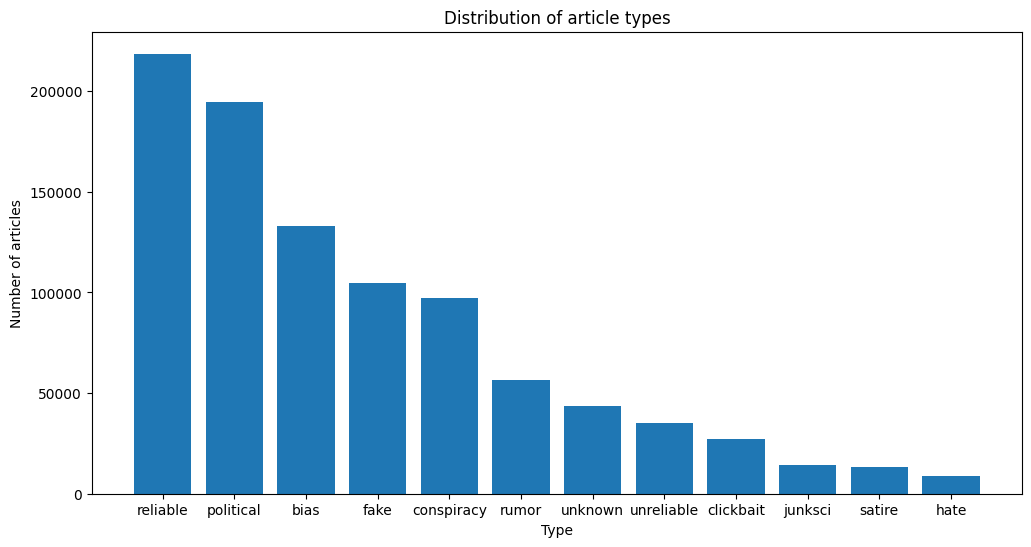

In [75]:
# Plot of the distribution of articles across the different types
plt.figure(figsize=(12,6))
plt.title('Distribution of article types')
plt.xlabel('Type')
plt.ylabel('Number of articles')
plt.bar(counts_type_df['unique_values'], counts_type_df['counts'])
plt.show()

### Looking into 'content'

In [ ]:
# Calculate lengths of 'content' strings
corpus_df_stemmed['content_length'] = corpus_df_stemmed.content.str.len()

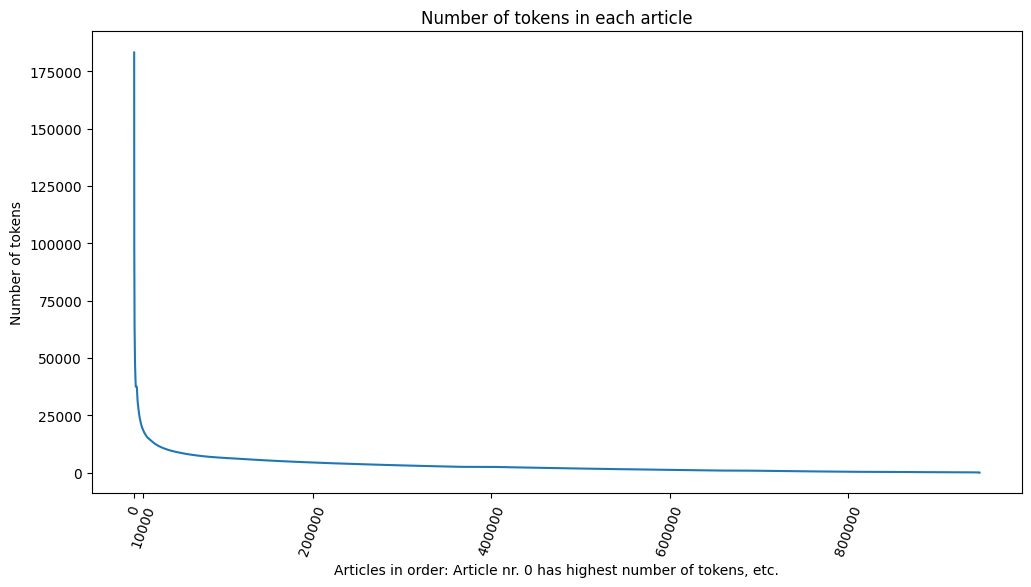

In [ ]:
# Plot of the number tokens in each article
plt.figure(figsize=(12,6))
plt.title('Number of tokens in each article')
plt.xlabel('Articles in order: Article nr. 0 has highest number of tokens, etc.')
plt.ylabel('Number of tokens')
plt.xticks([0,10000, 200000,400000, 600000, 800000])
plt.xticks(rotation=70)
plt.plot(corpus_df_stemmed.index, corpus_df_stemmed['content_length'].sort_values(ascending=False))
plt.show()

In [124]:
# Find average length of articles (token count) for each article type.
types = set(corpus_df_stemmed['type'])
types_df = pd.DataFrame(types)
types_df.columns = ['type']
types_df["average_token_count"] = np.nan


for index, row in types_df.iterrows():
    df_temp = corpus_df_stemmed.loc[corpus_df_stemmed['type'] == row['type']]
    types_df.at[index, 'average_token_count'] = sum(df_temp['content_length'])/df_temp.shape[0]

types_df = types_df.sort_values("average_token_count", ascending=False)


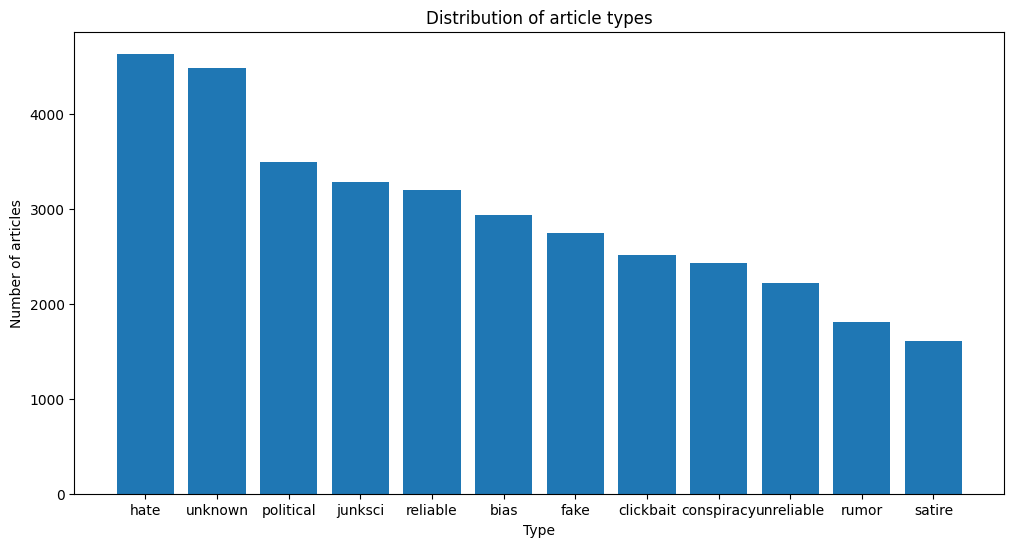

In [ ]:
# Plot the average length of articles (the token count) for each article type.
plt.figure(figsize=(12,6))
plt.title('Distribution of article types')
plt.xlabel('Type')
plt.ylabel('Number of articles')
plt.bar(types_df['type'], types_df['average_token_count'])
plt.show()

# Task 4

In [ ]:
train, valid, test = np.split(corpus_df.sample(frac=1, random_state=42), [int(0.8*len(corpus_df)), int(0.9*len(corpus_df))])

C:\Users\Krist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


pandas.core.frame.DataFrame